In [1]:

rel_types = [
    'rel:etymological_origin_of',
    'rel:is_derived_from',
    'rel:etymologically',
    'rel:has_derived_form',
    'rel:derived',
    'rel:variant:orthography',
    'rel:etymologically_related',
    'rel:etymology'
    ]


import matplotlib.pyplot as plt
import networkx as nx

from pathlib import Path

import pandas as pd

source_data_path = Path.cwd().parent.absolute() / "data" / "raw" / "etymologies.tsv"

# read data in chunks because it's very large... on second thought this might not be needed...
chunksize = 10 ** 6
source_data = pd.read_csv(source_data_path, sep='\t', header=None)
unique_rels = source_data[1].unique()

print(unique_rels)


['rel:etymological_origin_of' 'rel:has_derived_form' 'rel:is_derived_from'
 'rel:etymology' 'rel:etymologically_related' 'rel:variant:orthography'
 'rel:derived' 'rel:etymologically']


In [2]:
unique_words = source_data[0].unique()

print(len(unique_words))


2886098


In [3]:
unique_target_words = source_data[2].unique()

print(len(unique_target_words))


2880769


In [4]:
print(unique_words[0:100])
print(unique_target_words[0:100])


['aaq: Pawanobskewi' 'aaq: senabe' 'abe: waniigan' 'abs: beta' 'adt: yuru'
 'afr: -heid' 'afr: -ig' 'afr: -ing' 'afr: -lik' 'afr: -tjie'
 'afr: Afrikaner' 'afr: April' 'afr: Aprilmaande' 'afr: Augustus'
 'afr: Augustusmaande' 'afr: Ciskei' 'afr: Decembermaande' 'afr: Desember'
 'afr: Dinsdag' 'afr: Egipte' 'afr: Egiptenaar' 'afr: Februarie'
 'afr: Februariemaande' 'afr: Griekwa' 'afr: Januarie'
 'afr: Januariemaande' 'afr: Japan' 'afr: Julie' 'afr: Juliemaande'
 'afr: Junie' 'afr: Juniemaande' 'afr: Maandag' 'afr: Maart'
 'afr: Maartmaande' 'afr: Maleis' 'afr: Mei' 'afr: Meimaande'
 'afr: November' 'afr: Novembermaande' 'afr: Oktober' 'afr: Oktobermaande'
 'afr: Pieter' 'afr: September' 'afr: Septembermaande' 'afr: Woensdag'
 'afr: aalmoes' 'afr: aalmoesenier' 'afr: aalmoeseniershuis' 'afr: aalwee'
 'afr: aalwees' 'afr: aalwyn' 'afr: aalwyne' 'afr: aambeeld'
 'afr: aambeelde' 'afr: aambei' 'afr: aanbieder' 'afr: aanbieding'
 'afr: aanbod' 'afr: aanbodkant' 'afr: aand' 'afr: aande' 'afr

KeyboardInterrupt: 

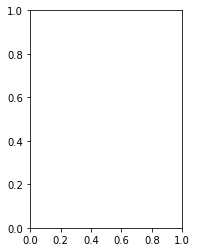

In [5]:

all_data = pd.read_csv(source_data_path, sep='\t', names=["source_node", "edge_type", "target_node"])

graph = nx.from_pandas_edgelist(
    all_data,
    edge_attr=["edge_type"],
    source="source_node",
    target="target_node"
    )

plt.subplot(121)

nx.draw(graph, with_labels=False)
plt.subplot(122)

nx.draw_shell(graph)
plt.show()